In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
import scipy.constants as const

In [36]:
Theta1r=np.genfromtxt('EmissionCu.dat', usecols=(0))
N1r=np.genfromtxt('EmissionCu.dat', usecols=(1))
Theta1=Theta1r*const.pi/180
X=[0]
N1f=np.sqrt(N1r)
N1=X*len(N1r)
a=0
while a<len(N1r):
    N1[a]=ufloat(N1r[a],N1f[a])
    a=a+1
dlif=201.4
lamda1=2*dlif*np.sin(Theta1)

Winkel 20.95 23.7
Energien 1.3792618054623904e-27 1.2269239376025353e-27


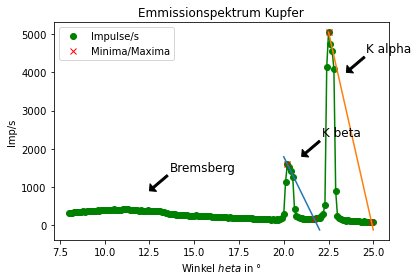

In [152]:
plt.plot(Theta1r,N1r,'go',label='Impulse/s')
plt.plot(Theta1r,N1r,'g-')

#plt.errorbar(lamda1,N1r,yerr=N1f,fmt='x')
plt.title('Emmissionspektrum Kupfer')
plt.annotate(r'K beta', xy=(21,1800), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'K alpha', xy=(23.5,4000), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.annotate(r'Bremsberg', xy=(12.5,900), xycoords='data',xytext=(+20, +20), textcoords='offset points', fontsize=12,arrowprops=dict(facecolor='black', headwidth=10,  headlength=5, width=2))
plt.xlabel('Winkel $\theta$ in °')
plt.ylabel('Imp/s')



min1=50
max1=135
min2=135
max2=171

g=0
h=0
i=0
j=0
while min1 <max1:
    if N1r[min1]>N1r[g]:
        g=min1
        min1=min1+1
    else:
        min1=min1+1

while min2 <max2:
    if N1r[min2]>N1r[h]:
        h=min2
        min2=min2+1
    else:
        min2=min2+1
min3=g
max3=h
min4=h
max4=171
while min3 <max3:
    if N1r[min3]<N1r[i]:
        i=min3
        min3=min3+1
    else:
        min3=min3+1

while min4 < max4:
    if N1r[min4]<N1r[j]:
        j=min4
        min4=min4+1
    else:
        min4=min4+1
z=np.linspace(20,22)
y=np.linspace(22.5,25)
plt.plot(Theta1r[g],N1r[g],'rx',label='Minima/Maxima')
plt.plot(Theta1r[h],N1r[h],'rx')
plt.plot(Theta1r[i],N1r[i],'rx')
plt.plot(Theta1r[j],N1r[j],'rx')
plt.legend(loc='best')
plt.savefig('Kupfer.pdf')
Mitte1=N1r[i]+(N1r[g]-N1r[i])/2
Mitte2=N1r[j]+(N1r[h]-N1r[j])/2
m1=(N1r[g]-N1r[i])/(Theta1r[g]-Theta1r[i])
m2=(N1r[h]-N1r[j])/(Theta1r[h]-Theta1r[j])
b1=N1r[g]-m1*Theta1r[g]
b2=N1r[h]-m2*Theta1r[h]
x1=((Mitte1-b1)/m1)*const.pi/180
x2=((Mitte2-b2)/m2)*const.pi/180
E1=const.h*const.c/(2*dlif*np.sin(x1))
E2=const.h*const.c/(2*dlif*np.sin(x2))
print('Winkel',x1*180/const.pi,x2*180/const.pi)
print('Energien',E1,E2)
plt.plot(z,(m1*z+b1))
plt.plot(y,(m2*y+b2))

In [107]:
Theta2r=np.genfromtxt('ComptonOhne.dat', usecols=(0))
N2r=np.genfromtxt('ComptonOhne.dat', usecols=(1))
Theta3r=np.genfromtxt('ComptonAl.dat', usecols=(0))
N3r=np.genfromtxt('ComptonAl.dat', usecols=(1))
Theta2=Theta2r*const.pi/180
Theta3=Theta3r*const.pi/180
lamda2=2*dlif*np.sin(Theta2)
lamda3=2*dlif*np.sin(Theta3)
N2f=np.sqrt(N2r)
N3f=np.sqrt(N3r)

N2=X*len(N2r)
N3=X*len(N3r)
b=0
while b < len(N2r):
    N2[b]=ufloat(N2r[b],N2f[b])
    b=b+1
c=0
while c < len(N3r):
    N3[c]=ufloat(N3r[c],N3f[c])
    c=c+1
#Totzeitkorrektur

tau=90e-6
d=0
I2=X*len(N2r)
I3=X*len(N3r)
I=X*len(N3r)
while d<len(N2r):
    I2[d]=N2[d]/(1-(tau*N2[d]))
    d=d+1
f=0
while f<len(N3r):
    I3[f]=N3[f]/(1-(tau*N3[f]))
    f=f+1
I2r=unp.nominal_values(I2)
I3r=unp.nominal_values(I3)
I2f=unp.std_devs(I2)
I3f=unp.std_devs(I3)
#print(N2,N3)
e=0
while e<len(I2):
    I[e]=I3[e]/I2[e]
    e=e+1
Ir=unp.nominal_values(I)
If=unp.std_devs(I)

a = -0.015 ± 0.000
b = 1.225 ± 0.014


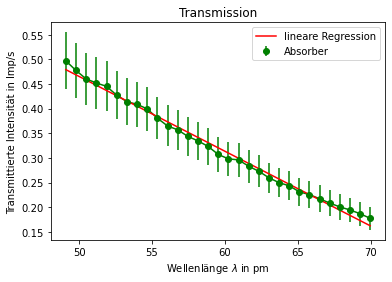

In [118]:
params, covariance_matrix = np.polyfit(lamda3, Ir, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')
z=np.linspace(lamda3[0],lamda3[len(lamda3)-1])
#plt.plot(lamda2,N2r,'g-')
#plt.plot(lamda3,N3r,'r-')
#plt.errorbar(lamda2,I2r,yerr=I2f,fmt='kx',label='Ohne Absorber')
#plt.errorbar(lamda3,I3r,yerr=I3f,fmt='yx',label='Absorber')
plt.errorbar(lamda3,Ir,yerr=If,fmt='go',label='Absorber')
plt.plot(lamda3,Ir,'g-')
plt.plot(z,params[0] * z + params[1],'r-',label='lineare Regression')
#plt.errorbar(lamda2,N2r,yerr=N2f,fmt='gx',label='Ohne Absorber')
#plt.errorbar(lamda3,N3r,yerr=N3f,fmt='rx',label='Mit Al Absorber')
plt.legend(loc='best')
plt.title('Transmission')
plt.xlabel('Wellenlänge $\lambda$ in pm')
plt.ylabel('Transmittierte Intensität in Imp/s')
plt.savefig('spektrum.pdf')

In [143]:
#Bestimmung der Compton Wellenlänge
I20=2731
I21=1180
I22=1024
T1=I21/I20
T2=I22/I20
lam1=(T1-params[1])/params[0]
lam2=(T2-params[1])/params[0]
print('T1=',T1,'Imp/s  Lambda=',lam1,'pm')
print('T2=',T2,'Imp/s  Lambda=',lam2,'pm')
lam=lam2-lam1
print('Comptonwellenlänge Lambda=',lam,'pm')

T1= 0.43207616257781034 Imp/s  Lambda= 52.18890824968357 pm
T2= 0.3749542292200659 Imp/s  Lambda= 55.94823298559772 pm
Comptonwellenlänge Lambda= 3.7593247359141486 pm
